In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap as LCM

sns.set_style('darkgrid')
colors = ['b', 'tab:orange', 'g', 'm']
cmap = LCM(colors)
%matplotlib inline

In [2]:
from models import *  # import our implementations

In [3]:
train = np.loadtxt('data/hwk3data/EMGaussian.train')
test = np.loadtxt('data/hwk3data/EMGaussian.test')

* Implement the K-means algorithm. Represent graphically the training data, the cluster centers, as well as the different clusters (use 4 colors). Try several random initializations and compare results (centers and the actual K-means objective values).

In [49]:
def plot_kmeans(train):
    km = KMeans(n_clusters=4)
    km.fit(train)
    idx = np.argsort(np.sum(km.Z(), axis=0))
    print(km.distortion(train), np.sum(km.Z(), axis=0)[idx], [np.round(row, 2) for row in km.mu[idx]])
    plt.xlim((-11, 11))
    plt.ylim((-11, 11))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(train[:, 0], train[:, 1], marker='.',
                c=km.labels_, cmap=cmap)
    for i in range(km.K):
        plt.scatter(km.mu[i, 0], km.mu[i, 1], c=colors[i], s=110,
                    edgecolors='k', marker='o', label='Cluster %d' % (i+1))
    plt.legend(loc=4, prop={'size': 15})

3237.66842663 [109 119 129 143] [array([ 3.8,  5.1]), array([-2.24,  4.16]), array([-3.78, -4.22]), array([ 3.36, -2.66])]
3237.7795965 [109 120 127 144] [array([ 3.8,  5.1]), array([-2.24,  4.13]), array([-3.82, -4.27]), array([ 3.34, -2.64])]
3239.24045787 [109 117 135 139] [array([ 3.8,  5.1]), array([-2.24,  4.24]), array([-3.66, -4.07]), array([ 3.48, -2.7 ])]
3240.17326636 [112 125 131 132] [array([ 3.79,  5.  ]), array([-2.14,  3.97]), array([-3.72, -4.18]), array([ 3.57, -2.88])]


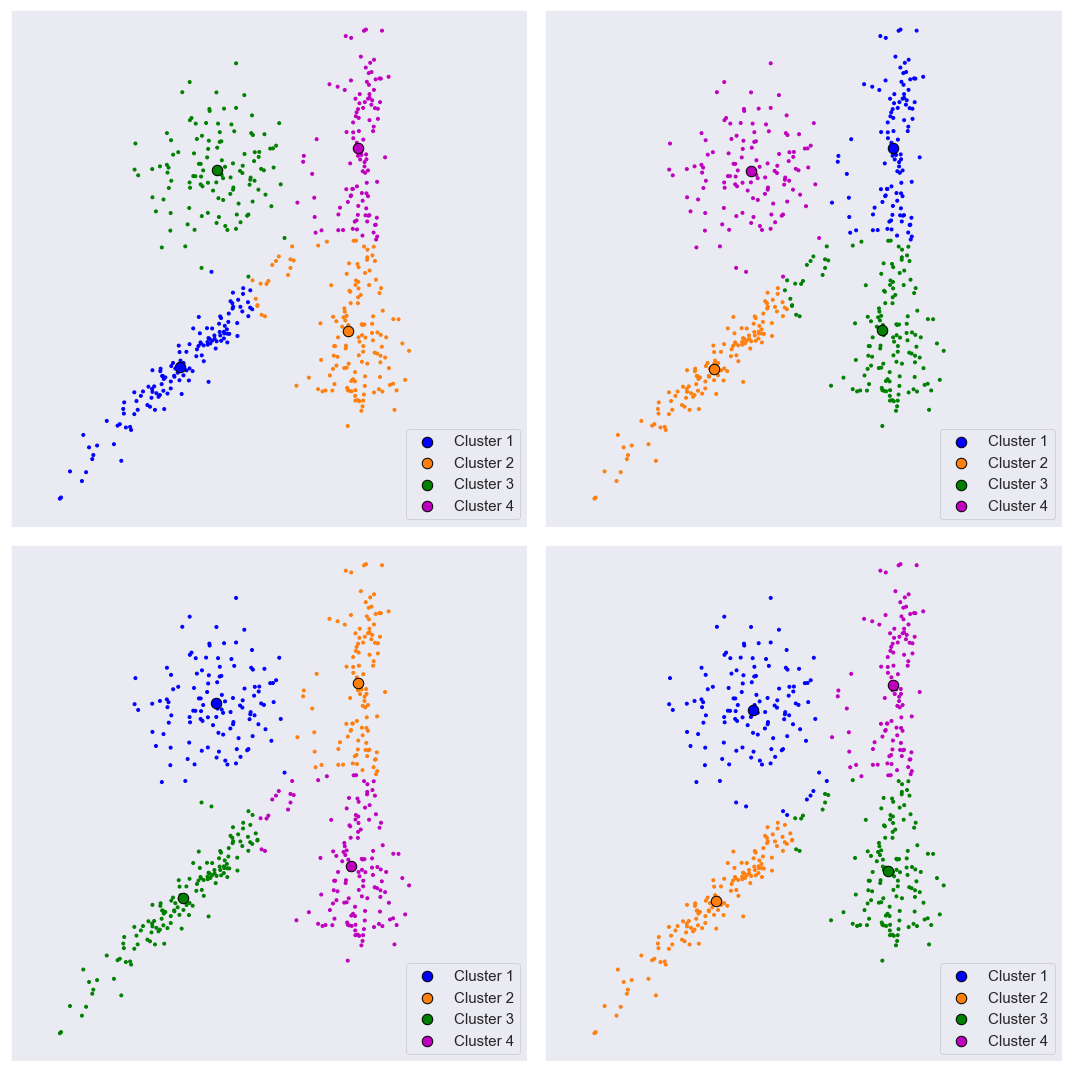

In [59]:
plt.figure(figsize=(15, 15))
for i in range(1,5):
    plt.subplot(2, 2, i)
    plot_kmeans(train)
plt.tight_layout()
#plt.show()
plt.savefig('HW3_KM')

* Consider a Gaussian mixture model in which the covariance matrices are proportional to the identity. Implement the EM algorithm (using an initialization with K-means). Represent graphically the training data, the centers, as well as the covariance matrices

In [9]:
igmm = IGMM(n_clusters=4)
igmm.fit(train)
test_labels = igmm.predict(test)

EM updates converged at iteration 84


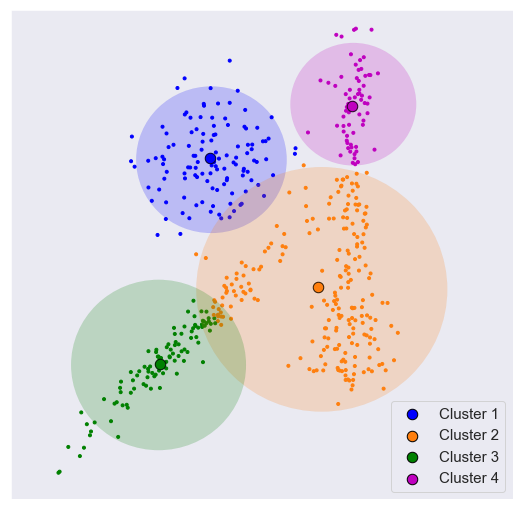

In [62]:
plt.figure(figsize=(9, 9))
ax = plt.gca()
plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.xticks([])
plt.yticks([])
plt.scatter(train[:, 0], train[:, 1], 
            c=igmm.labels_, marker='.', cmap=cmap)
for i in range(igmm.K):
    plt.scatter(igmm.mu[i, 0], igmm.mu[i, 1], s=110,
                c=colors[i], marker='o', edgecolor='k',
                label='Cluster %d' % (i+1))
    r = np.sqrt(igmm.var[i] * (-2 * np.log(1 - 0.9)))
    idx = np.where(igmm.labels_ == i)
    mu = np.mean(train[idx], axis=0)
    cir = plt.Circle(mu, r, fill=True, color=colors[i], lw=0.1)
    #cir.set_clip_box(ax.bbox)
    cir.set_alpha(0.2)
    ax.add_patch(cir)
plt.legend(loc=4, prop={'size': 15})
plt.savefig('HW3_IGMM')

In [29]:
gmm = GMM(n_clusters=4)
gmm.fit(train)

EM updates converged at iteration 35


In [30]:
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

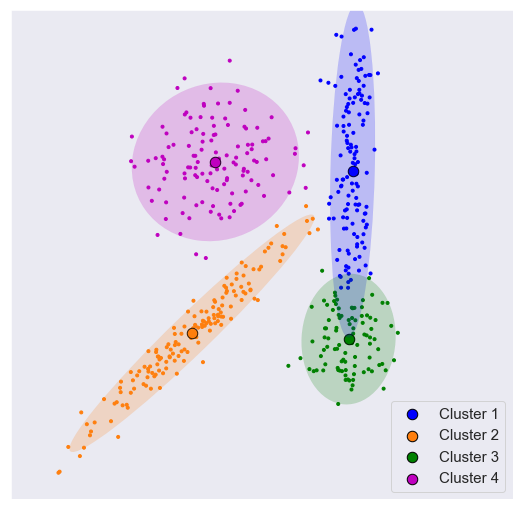

In [63]:
plt.figure(figsize=(9, 9))
ax = plt.gca()
plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.xticks([])
plt.yticks([])
plt.scatter(train[:, 0], train[:, 1], 
            c=gmm.labels_, cmap=cmap, marker='.')
#plt.scatter(unsure[:, 0], unsure[:, 1], c='k')
for i in range(gmm.K):
    plt.scatter(gmm.mu[i, 0], gmm.mu[i, 1], s=110,
                c=colors[i], marker='o', edgecolor='k',
                label='Cluster %d' % (i+1))
    vals, vecs = eigsorted(gmm.Sigma[i])
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    idx = np.where(gmm.labels_ == i)
    w, h = 2 * np.sqrt(vals * (-2 * np.log(1 - 0.9)))  # factor to get 90% prob
    ell = Ellipse(xy=gmm.mu[i], lw=0.1,
                  width=w, height=h, fill=True,
                  angle=theta, color=colors[i])
    #ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.2)
    ax.add_patch(ell)
plt.legend(loc=4, prop={'size': 15})
plt.savefig('HW3_GMM')

In [57]:
igmm.neg_log_llhd(train), igmm.neg_log_llhd(test)

(5.2910486629628988, 5.3881518507534265)

In [34]:
gmm.neg_log_llhd(train), gmm.neg_log_llhd(test)

(4.6554315343293071, 4.8179858475052599)